In [1]:
import pandas as pd

df = pd.read_csv("magnetic_insulators.csv")

#visualizing the data
print("Data Overview:")
df.head()         # First 5 rows
df.tail()         # Last 5 rows
df.sample(8)      # Random 5 rows


Data Overview:


,material_id,formula,band_gap,ordering,numberofelements,density_atomic,elements,volume,nsites,composition,chemsys,density,symmetry,structure,efermi,total_magnetization_normalized_vol,num_magnetic_sites,num_unique_magnetic_sites,types_of_magnetic_species,theoretical
30094,mp-11917,Mg(BeN)2,4.0657,NM,3,7.585575,"[Element Be, Element Mg, Element N]",37.927876,5,Mg1 Be2 N2,Be-Mg-N,3.079711,crystal_system=<CrystalSystem.trig: 'Trigonal'...,Full Formula (Mg1 Be2 N2)\nReduced Formula: Mg...,5.560648,0.000000e+00,0,0,[],False
30294,mp-1330256,Mg(SbO2)2,1.4446,NM,3,15.574995,"[Element Mg, Element O, Element Sb]",872.199700,56,Mg8 Sb16 O32,Mg-O-Sb,5.053929,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Mg8 Sb16 O32)\nReduced Formula: ...,6.574178,4.839488e-07,0,0,[],True
35971,mp-28360,Na3CrCl6,1.7196,FM,3,23.856424,"[Element Cl, Element Cr, Element Na]",477.128472,20,Na6 Cr2 Cl12,Cl-Cr-Na,2.322621,crystal_system=<CrystalSystem.trig: 'Trigonal'...,Full Formula (Na6 Cr2 Cl12)\nReduced Formula: ...,0.239235,1.257523e-02,2,1,['Cr'],False
4188,mp-1008500,BaO,2.3602,NM,2,21.007765,"[Element Ba, Element O]",84.031061,4,Ba2 O2,Ba-O,6.059771,crystal_system=<CrystalSystem.hex_: 'Hexagonal...,Full Formula (Ba2 O2)\nReduced Formula: BaO\na...,2.033464,0.000000e+00,0,0,[],False
41506,mp-673303,Nd(HO)3,3.7306,NM,3,9.928497,"[Element H, Element Nd, Element O]",138.998954,14,Nd2 H6 O6,H-Nd-O,4.665410,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Nd2 H6 O6)\nReduced Formula: Nd(...,0.900730,2.053972e-06,0,0,[],True
8360,mp-778015,Ce(WO4)2,1.4689,NM,3,16.708662,"[Element Ce, Element O, Element W]",1470.362214,88,Ce8 W16 O64,Ce-O-W,5.744196,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Ce8 W16 O64)\nReduced Formula: C...,-0.132370,1.449031e-06,0,0,[],True
7180,mp-1044000,CaLaFeMoO6,1.2186,FM,5,12.626270,"[Element Ca, Element Fe, Element La, Element M...",252.525395,20,Ca2 La2 Fe2 Mo2 O12,Ca-Fe-La-Mo-O,5.612582,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Ca2 La2 Fe2 Mo2 O12)\nReduced Fo...,6.648669,5.544009e-02,4,2,"['Fe', 'Mo']",True
9753,mp-989594,Cs2NaGaH6,1.0896,NM,4,15.961828,"[Element Cs, Element Ga, Element H, Element Na]",159.618277,10,Cs2 Na1 Ga1 H6,Cs-Ga-H-Na,3.792704,crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,Full Formula (Cs2 Na1 Ga1 H6)\nReduced Formula...,0.832964,2.192731e-08,0,0,[],True


Classification Report:
              precision    recall  f1-score   support

         AFM       0.93      0.82      0.87       589
          FM       0.96      1.00      0.98      4162
         FiM       0.87      0.08      0.15       238
          NM       0.99      1.00      0.99     11550

    accuracy                           0.98     16539
   macro avg       0.94      0.72      0.75     16539
weighted avg       0.98      0.98      0.97     16539



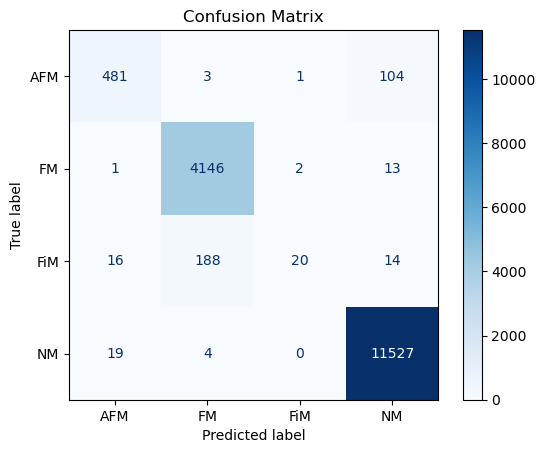

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("magnetic_insulators.csv")

# Step 1: Clean and parse 'elements' column
def parse_elements(val):
    if pd.isna(val):  # Handle NaN
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# Step 2: Drop rows with missing values in important columns
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites","density","density_atomic"]
df = df.dropna(subset=numerical_features + ["ordering"])

# Step 3: One-hot encode 'elements'
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# Step 4: Prepare feature matrix X and label vector y
X = pd.concat([df[numerical_features].reset_index(drop=True), element_df.reset_index(drop=True)], axis=1)

le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

# Step 6: Train Random Forest
clf = RandomForestClassifier(n_estimators=200, random_state=42,class_weight='balanced',max_depth=50)
clf.fit(X_train, y_train)

# Step 7: Evaluate model
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Step 8: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


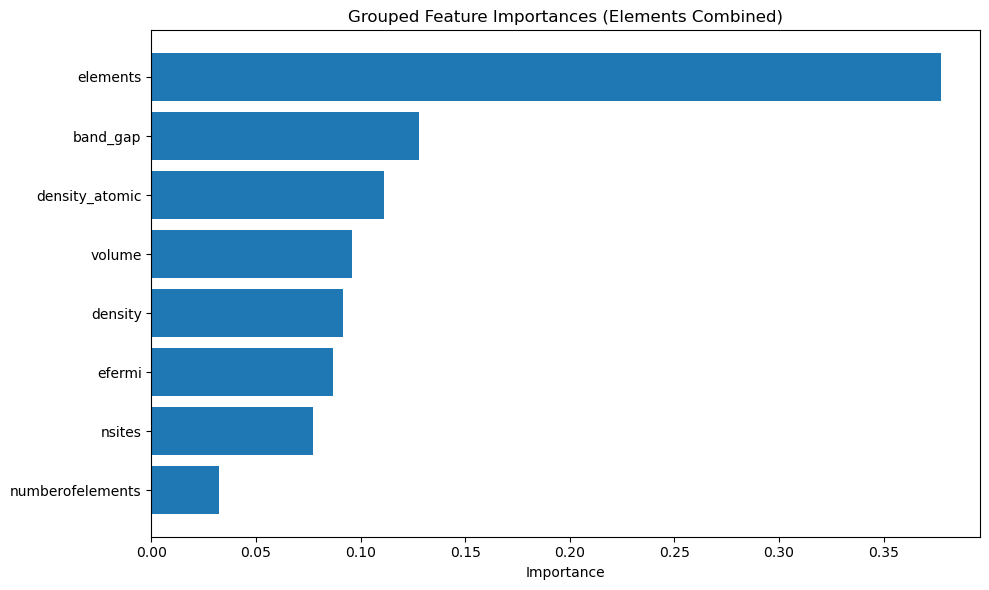

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Define numerical feature names
#numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites"]

# Create feature importance DataFrame
importances = clf.feature_importances_
feat_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
})

# Split into numerical and elements
numerical_df = feat_df[feat_df["feature"].isin(numerical_features)]
element_importance = feat_df[~feat_df["feature"].isin(numerical_features)]["importance"].sum()

# Add the grouped "elements" row
grouped_df = pd.concat([
    numerical_df,
    pd.DataFrame([{"feature": "elements", "importance": element_importance}])
], ignore_index=True)

# Sort for plot
grouped_df = grouped_df.sort_values("importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(grouped_df["feature"], grouped_df["importance"])
plt.xlabel("Importance")
plt.title("Grouped Feature Importances (Elements Combined)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

         AFM       0.58      0.28      0.37       589
          FM       0.82      0.90      0.86      4162
         FiM       0.52      0.11      0.19       238
          NM       0.97      0.98      0.98     11550

    accuracy                           0.92     16539
   macro avg       0.72      0.57      0.60     16539
weighted avg       0.91      0.92      0.91     16539



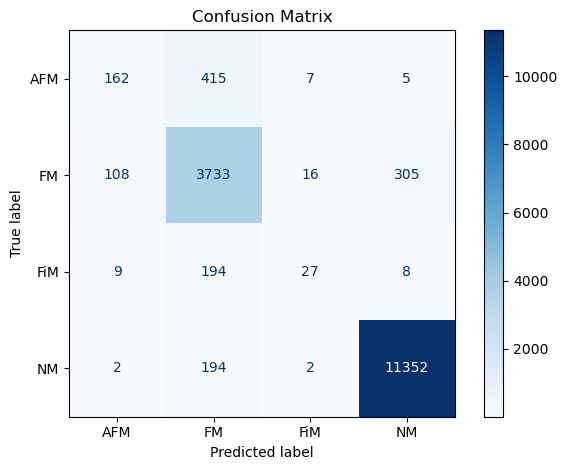

In [39]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load CSV ===
df = pd.read_csv("magnetic_insulators.csv")

# === 2. Parse elements column: ['Element Fe', 'Element O'] → ['Fe', 'O'] ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract crystal system from symmetry column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 4. Drop rows with missing essential features ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", "density"]
df = df.dropna(subset=numerical_features + ["ordering"])

# === 5. One-hot encode elements ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 6. One-hot encode crystal system ===
crystal_df = pd.get_dummies(df["crystal_system"], prefix="crysys")

# === 7. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    crystal_df.reset_index(drop=True)
], axis=1)

# === 8. Encode target ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 9. Stratified Train/Test Split ===
if len(df) > 0 and len(set(y)) > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    # === 10. GridSearchCV to find best Random Forest parameters ===
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [30, 50, None],
        'class_weight': ['balanced'],
        'min_samples_split': [2, 5],
    }

    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        scoring='f1_weighted',
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    print(f"✅ Best Parameters: {grid_search.best_params_}\n")

    # === 11. Predict and Report ===
    y_pred = best_clf.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # === 12. Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("❗ Not enough data or diversity in target classes to perform training.")


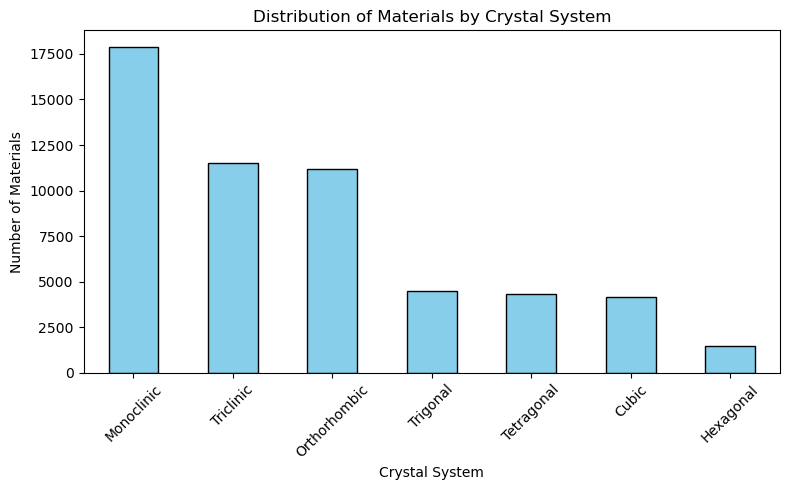

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load CSV file
df = pd.read_csv("magnetic_insulators.csv")

# Correct crystal system parser
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

# Apply extraction
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# Count and plot
counts = df["crystal_system"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Materials by Crystal System")
plt.xlabel("Crystal System")
plt.ylabel("Number of Materials")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [42]:
# === 13. Feature Importance ===
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importances
feat_imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Display top 20 features
print("\nTop 20 Feature Importances:")
print(feat_imp_df.head(20))



Top 20 Feature Importances:
               feature  importance
0             band_gap    0.123013
2       density_atomic    0.101073
3               volume    0.088982
6              density    0.084703
4               efermi    0.081997
5               nsites    0.073110
31                  Fe    0.032242
1     numberofelements    0.030370
49                  Mn    0.029391
58                   O    0.020530
46                  Li    0.020522
89                   V    0.018963
24                  Cr    0.017557
23                  Co    0.016420
56                  Ni    0.015799
33                  Gd    0.013674
101   crysys_Triclinic    0.013149
30                   F    0.012781
98   crysys_Monoclinic    0.012740
60                   P    0.010885


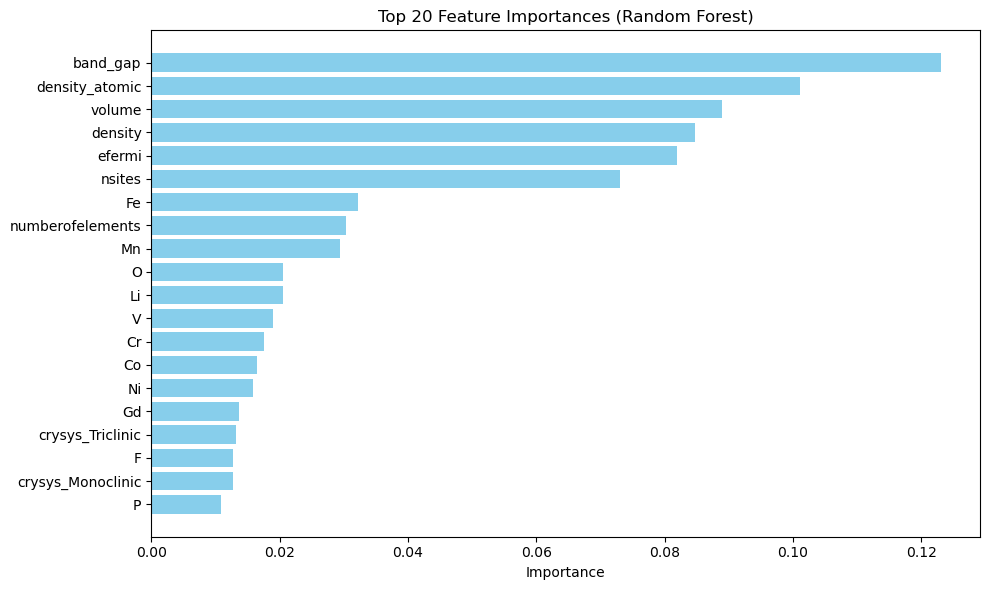

In [36]:
# === 14. Plot Top N Feature Importances ===
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["feature"][:top_n][::-1], feat_imp_df["importance"][:top_n][::-1], color="skyblue")
plt.xlabel("Importance")
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


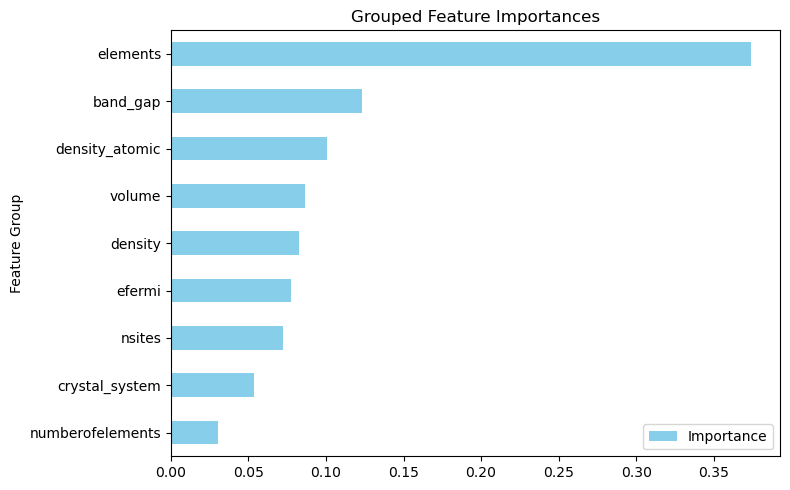

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Feature importances from the best model (after GridSearch)
importances = best_clf.feature_importances_
feature_names = X.columns

# Grouping
grouped_importance = {
    'band_gap': 0,
    'density_atomic': 0,
    'volume': 0,
    'efermi': 0,
    'density': 0,
    'nsites': 0,
    'numberofelements': 0,
    'elements': 0,
    'crystal_system': 0
}

for name, imp in zip(feature_names, importances):
    if name in grouped_importance:
        grouped_importance[name] += imp
    elif name in mlb.classes_:  # element one-hot
        grouped_importance["elements"] += imp
    elif name.startswith("crysys_"):
        grouped_importance["crystal_system"] += imp

# Plot
group_df = pd.DataFrame(list(grouped_importance.items()), columns=["Feature Group", "Importance"])
group_df.sort_values("Importance", ascending=True).plot.barh(x="Feature Group", y="Importance", figsize=(8,5), color="skyblue")
plt.title("Grouped Feature Importances")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 12 candidates, totalling 36 fits

✅ Best Parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}



/home/ahmedfahmy177/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/home/ahmedfahmy177/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


✅ Selected Features after pruning:
['band_gap', 'numberofelements', 'density_atomic', 'volume', 'efermi', 'nsites', 'density', 'C', 'Co', 'Cr', 'F', 'Fe', 'Gd', 'H', 'K', 'Li', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Ni', 'O', 'P', 'S', 'Si', 'Ti', 'V', 'W', 'crysys_Monoclinic', 'crysys_Orthorhombic', 'crysys_Tetragonal', 'crysys_Triclinic', 'crysys_Trigonal']

Classification Report:
              precision    recall  f1-score   support

         AFM       0.57      0.24      0.33       589
          FM       0.82      0.90      0.86      4162
         FiM       0.49      0.10      0.16       238
          NM       0.97      0.98      0.98     11550

    accuracy                           0.92     16539
   macro avg       0.71      0.55      0.58     16539
weighted avg       0.91      0.92      0.91     16539



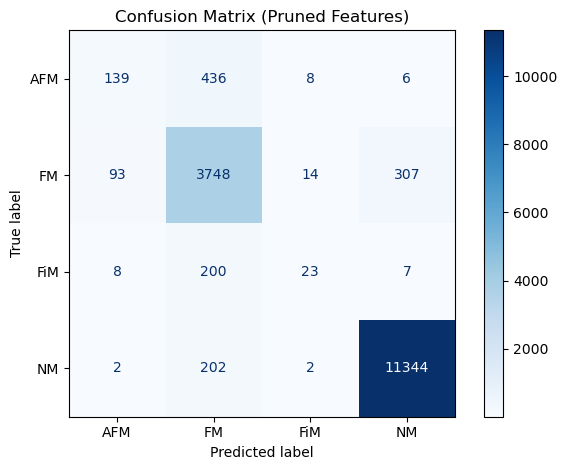

In [45]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel

# === 1. Load CSV ===
df = pd.read_csv("magnetic_insulators.csv")

# === 2. Parse elements column: ['Element Fe', 'Element O'] → ['Fe', 'O'] ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract crystal system from symmetry column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 4. Drop rows with missing essential features ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", "density"]
df = df.dropna(subset=numerical_features + ["ordering"])

# === 5. One-hot encode elements ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 6. One-hot encode crystal system ===
crystal_df = pd.get_dummies(df["crystal_system"], prefix="crysys")

# === 7. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    crystal_df.reset_index(drop=True)
], axis=1)

# === 8. Encode target ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 9. Stratified Train/Test Split ===
if len(df) > 0 and len(set(y)) > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    # === 10. GridSearchCV to find best Random Forest parameters ===
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [30, 50, None],
        'class_weight': ['balanced'],
        'min_samples_split': [2, 5],
    }

    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        scoring='f1_weighted',
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    print(f"\n✅ Best Parameters: {grid_search.best_params_}\n")

    # === 10b. Prune low-importance features ===
    selector = SelectFromModel(best_clf, threshold="0.5*mean", prefit=True)
    X_train_reduced = selector.transform(X_train)
    X_test_reduced = selector.transform(X_test)

    selected_features = X.columns[selector.get_support()]
    print("✅ Selected Features after pruning:")
    print(selected_features.tolist())

    # === 10c. Retrain classifier on reduced feature set ===
    clf_reduced = RandomForestClassifier(**grid_search.best_params_, random_state=42)
    clf_reduced.fit(X_train_reduced, y_train)

    # === 11. Predict and Report ===
    y_pred = clf_reduced.predict(X_test_reduced)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # === 12. Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix (Pruned Features)")
    plt.tight_layout()
    plt.show()

else:
    print("❗ Not enough data or diversity in target classes to perform training.")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 7, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

         AFM       0.54      0.18      0.27       589
          FM       0.81      0.92      0.86      4162
         FiM       0.30      0.08      0.13       238
          NM       0.98      0.98      0.98     11550

    accuracy                           0.92     16539
   macro avg       0.66      0.54      0.56     16539
weighted avg       0.91      0.92      0.91     16539



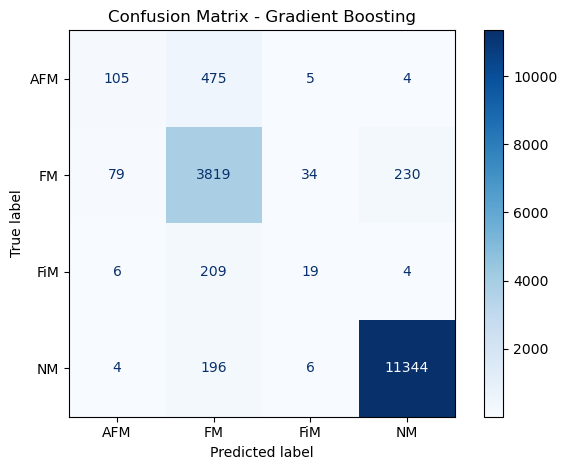

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load CSV ===
df = pd.read_csv("magnetic_insulators.csv")

# === 2. Parse 'elements' column: ['Element Fe', 'Element O'] → ['Fe', 'O'] ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 4. Drop rows with missing values ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", "density"]
df = df.dropna(subset=numerical_features + ["ordering"])

# === 5. One-hot encode elements and crystal systems ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

crystal_df = pd.get_dummies(df["crystal_system"], prefix="crysys")

# === 6. Combine all features ===
X = pd.concat([df[numerical_features].reset_index(drop=True),
               element_df.reset_index(drop=True),
               crystal_df.reset_index(drop=True)], axis=1)

# === 7. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 8. Train/Test Split ===
if len(df) > 0 and len(set(y)) > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    # === 9. Grid Search with Gradient Boosting ===
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 6],
        'min_samples_split': [2, 7],
    }

    grid_search = GridSearchCV(
        GradientBoostingClassifier(random_state=42),
        param_grid,
        scoring='f1_weighted',
        cv=3,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    print("✅ Best Parameters:", grid_search.best_params_)

    # === 10. Predict and Evaluate ===
    y_pred = best_clf.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # === 11. Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix - Gradient Boosting")
    plt.tight_layout()
    plt.show()
else:
    print("❗ Not enough data or diversity in target classes to train.")
